# Laboratorio 5

# Ecuación normal

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Demostración

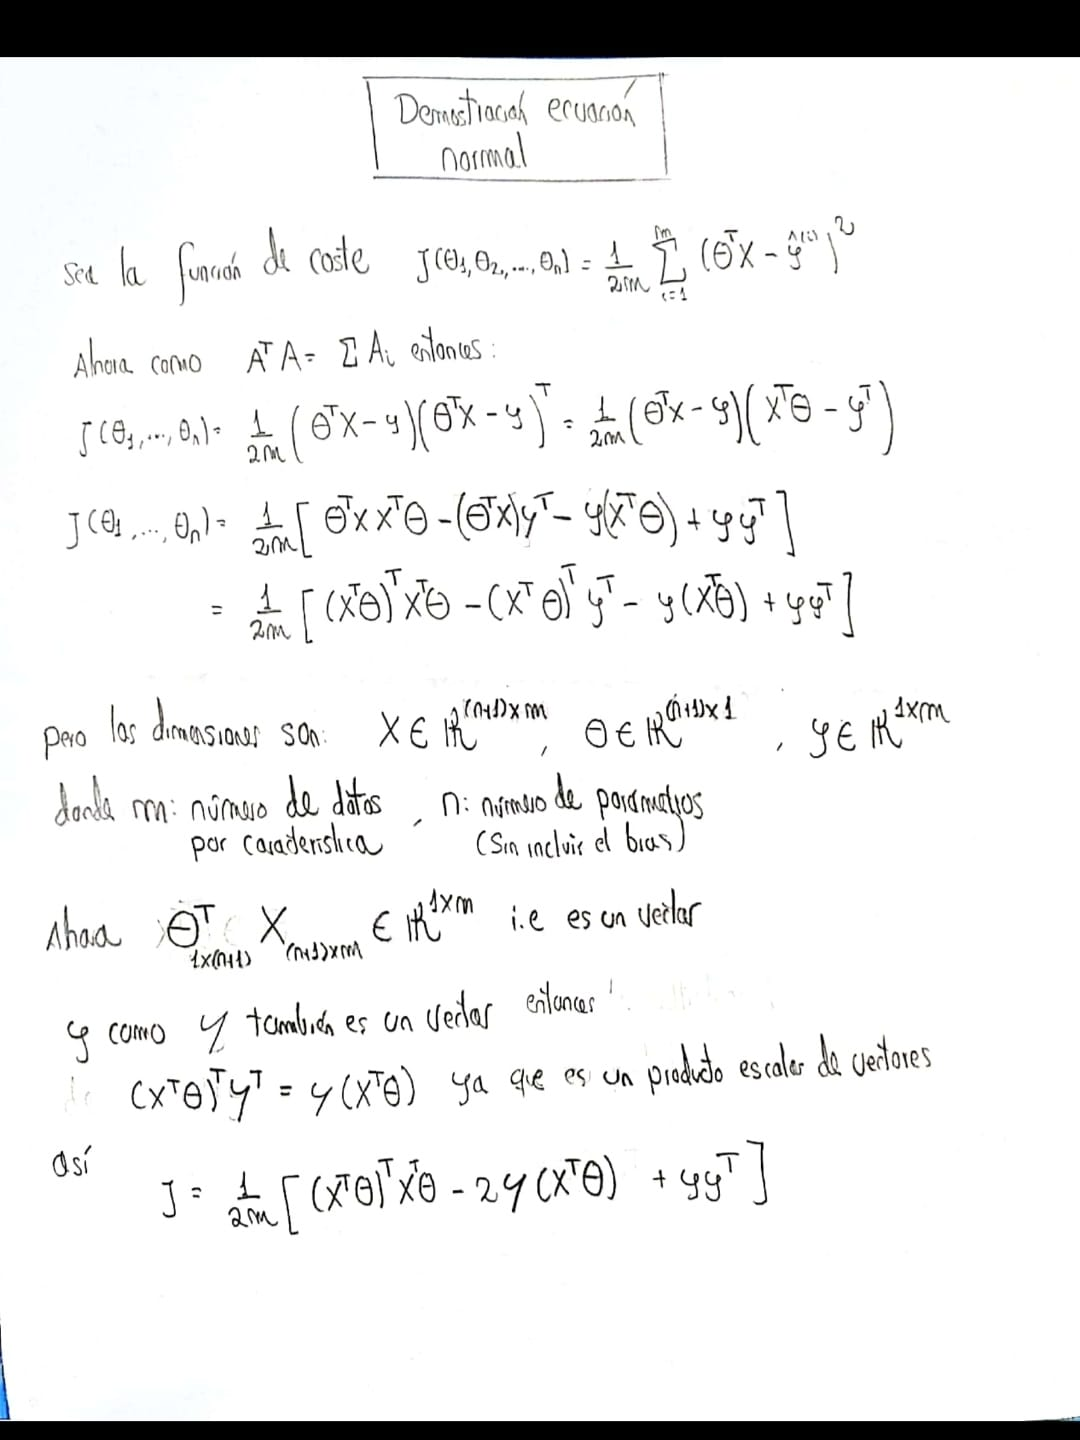



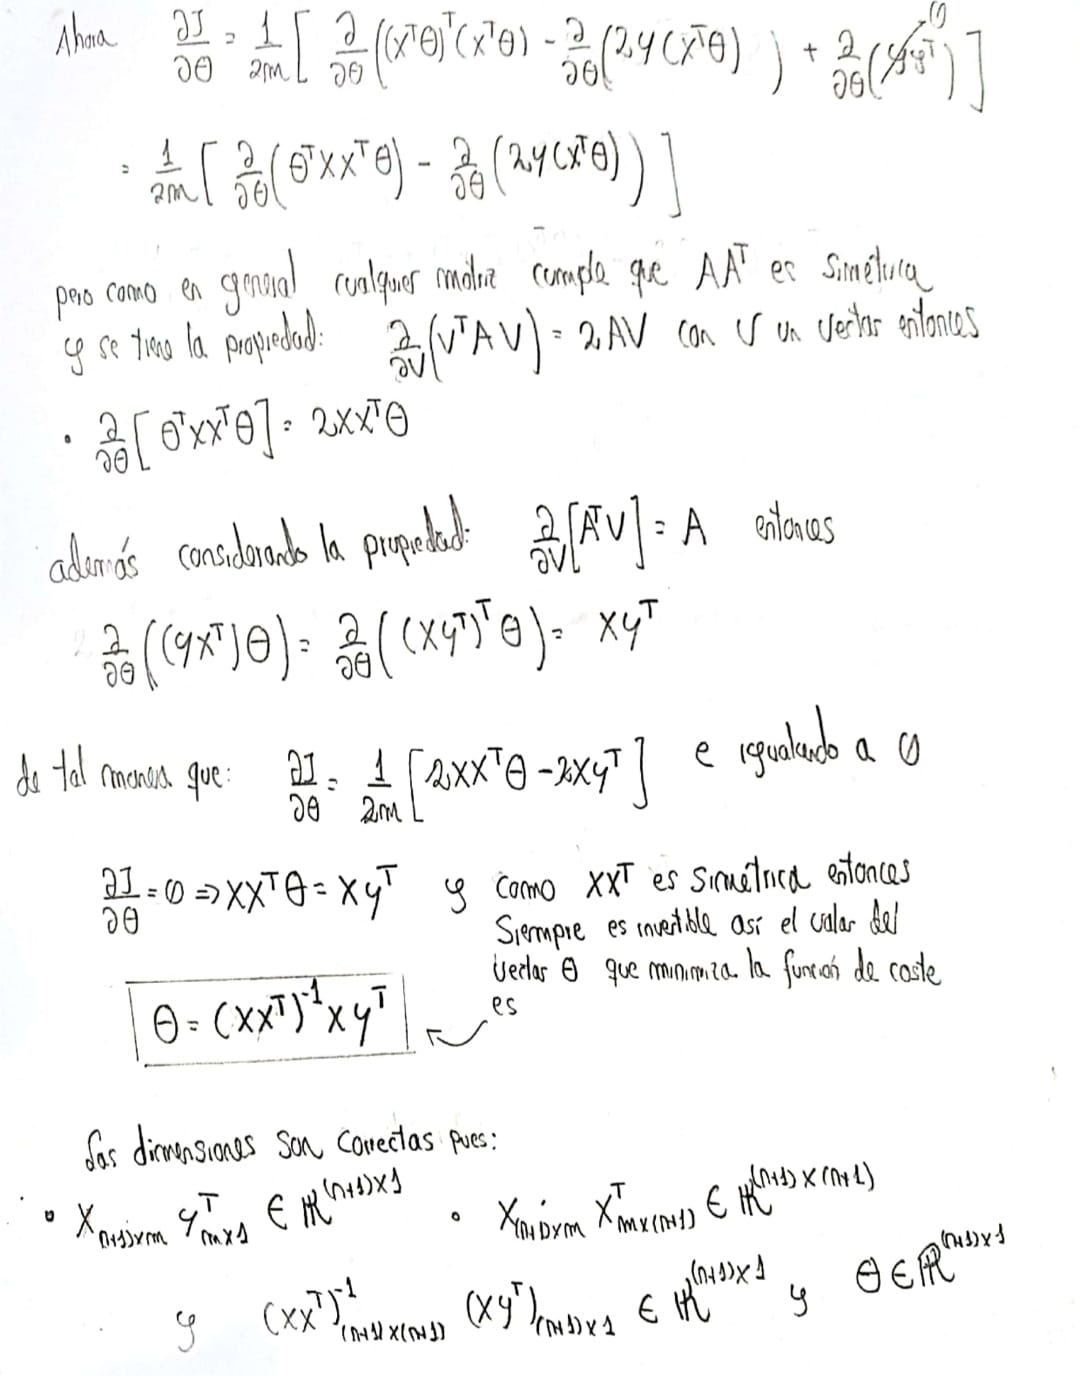

Es de notar que en la demostración anterior las dimensiones de $X$ son $[n+1,m]$, y las de $Y$ son $[1,m]$ mientras que en la implementación computacional las dimensiones de $X$ son $[m,n+1]$, $Y$ son $[m,1]$. Esta es la razón por la cual la ecuación final es ligeramente diferente pero la dos definiciones son equivalentes pues una es la trasposición de la otra.

In [2]:
plt.rcParams.update({'font.size': 18})

In [58]:
def normalEquation(X_values,y):

    m    = X_values.shape[1] #número de observaciones
    ones = np.ones(m)
    
    X_t = np.vstack((ones,X_values))
    X   = X_t.T
    y   = y.reshape((m,1))
    
    Theta = np.linalg.inv(X_t@X)@ (X_t @ y)
    
    return Theta.flatten()

## 1. Para datos construidos sintéticamente

In [59]:
x1=np.random.random(5)*4
x2=np.random.random(5)*5
x3=np.random.random(5)*5


y=0+2*x1+3*x2+7*x3# +1.2*x4

X_values=np.vstack((x1,x2,x3))

In [60]:
X_values

array([[3.39770247, 2.43463754, 3.26463256, 2.7526767 , 0.09258682],
       [1.8549693 , 4.78507207, 4.58563015, 3.41092614, 2.52666118],
       [0.40703551, 3.20081134, 0.45492476, 0.93088655, 3.24908223]])

In [61]:
Theta=normalEquation(X_values=X_values,y=y)
Theta

array([2.84217094e-13, 2.00000000e+00, 3.00000000e+00, 7.00000000e+00])

Se observa que los valores encontrados son exactamente iguales a los parámetros con los que se generó la distribución de puntos

## 2. Para el dataset Boston Houses

In [62]:
# Tomar los datos de las casas de boston y hacer una regresion lineal tomando 
# el average number of rooms per dwelling.
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=21, header=None)

In [63]:
raw_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8


In [64]:
raw_df.values[::2, :].shape

(506, 11)

In [65]:
 raw_df.values[1::2, :2].shape

(506, 2)

In [66]:
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]] )
target = raw_df.values[1::2, 2]

df = pd.DataFrame({"rm":data[:,5], "mean":target})


In [67]:
df

,rm,mean
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2
...,...,...
501,6.593,22.4
502,6.120,20.6
503,6.976,23.9
504,6.794,22.0


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rm      506 non-null    float64
 1   mean    506 non-null    float64
dtypes: float64(2)
memory usage: 8.0 KB


Text(0, 0.5, 'Target')

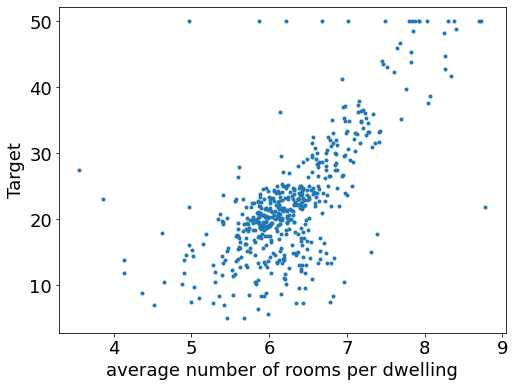

In [69]:
plt.figure(figsize=(8,6))
plt.plot(df['rm'], df['mean'], ".")
plt.xlabel("average number of rooms per dwelling")
plt.ylabel("Target")

In [99]:
m = df['rm'].values.shape[0]

X_values = df['rm'].values.reshape((1, m))
y = df['mean'].values.reshape((m,1))

In [100]:
Theta_Boston=normalEquation(X_values = X_values ,y= y )

In [101]:
Theta_Boston

array([-34.67062078,   9.10210898])

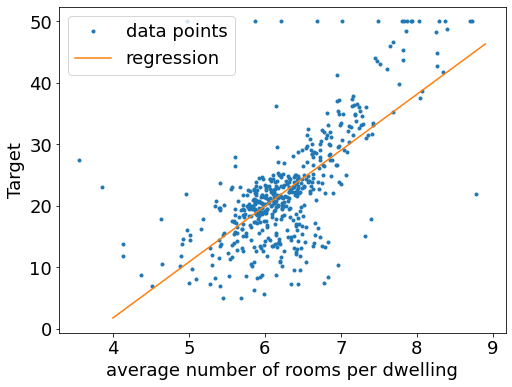

In [106]:
x = np.arange(4,9,0.1)

plt.figure(figsize=(8,6))
plt.plot(df['rm'], df['mean'], ".", label = "data points")
plt.plot(x, Theta_Boston[0] +Theta_Boston[1]*x , label= "regression")
plt.xlabel("average number of rooms per dwelling")
plt.ylabel("Target")
plt.legend()